##  Material for the course "Numerical Simulation of reactive flows"  
Author: Jun.-Prof. Federica Ferraro \
Technische Universität Braunschweig \
Institut für Flugantriebe und Strömungsmaschinen (IFAS)

### Exercise 1 - Calculation of the thermophysical properties

In this exercise we calculate the thermophysical properties of a gas and a mixture of gases.\
Documentation:\
https://cantera.org/dev/python/thermo.html

In [3]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
#The following line will create a cantera gas mixture object 
#The mixture will contain all the species included in the gri30.yaml file

gas1 = ct.Solution('gri30.yaml')


In the following some interesting variables are printed as examples. 

In [5]:
#List the species of the mixture
gas1.species_names

['H2',
 'H',
 'O',
 'O2',
 'OH',
 'H2O',
 'HO2',
 'H2O2',
 'C',
 'CH',
 'CH2',
 'CH2(S)',
 'CH3',
 'CH4',
 'CO',
 'CO2',
 'HCO',
 'CH2O',
 'CH2OH',
 'CH3O',
 'CH3OH',
 'C2H',
 'C2H2',
 'C2H3',
 'C2H4',
 'C2H5',
 'C2H6',
 'HCCO',
 'CH2CO',
 'HCCOH',
 'N',
 'NH',
 'NH2',
 'NH3',
 'NNH',
 'NO',
 'NO2',
 'N2O',
 'HNO',
 'CN',
 'HCN',
 'H2CN',
 'HCNN',
 'HCNO',
 'HOCN',
 'HNCO',
 'NCO',
 'N2',
 'AR',
 'C3H7',
 'C3H8',
 'CH2CHO',
 'CH3CHO']

In [6]:
# Obtain the number of species in the mixture
gas1.n_species

53

In [7]:
# Obtain the index i of the species Mi
gas1.species_index('N2')

47

In [8]:
#Set gas1 equal to air mixture (79% N2 and 21% O2, by volume) at T = 300 K and atmospheric pressure  

gas1.TPX=300,101325,'N2:0.79,O2:0.21'

# Determine the molecular weight of the mixture
gas1.mean_molecular_weight

28.850640000000002

In [9]:
gas1.cp_mole # J/kmol/K

29141.12593758545

In [10]:
ct.constants.gas_constant # J/kmol/K

8314.46261815324

#### Question 1: Determine the specific heat at constant pressure cp of O2 at T = 300 K 

In [11]:
T = 300 
i_O2 = gas1.species_index('O2')
O2 = gas1.species(i_O2)
O2.thermo.cp (T)/1000 # kJ/kmol/K 

29.388071132483976

In [12]:
#alternative solution: note that the temperature in this case is set in the command gas1.TPX 
gas1.partial_molar_cp[i_O2]/1000 # kJ/kmol/K 

29.388071132483976

#### Question 2: Plot the molar heat capacity at constant pressure cp over temperature for O2 between 300 K and 2500 K.

In [13]:
T_start = 300
T_end = 2500
T_list = np.linspace(T_start, T_end, 100)
cp_m_O2_list = []

for T in T_list:
    cp_m=O2.thermo.cp (T)/1000 # kJ/kmol/K
    cp_m_O2_list.append(cp_m)

print(T_list)


[ 300.          322.22222222  344.44444444  366.66666667  388.88888889
  411.11111111  433.33333333  455.55555556  477.77777778  500.
  522.22222222  544.44444444  566.66666667  588.88888889  611.11111111
  633.33333333  655.55555556  677.77777778  700.          722.22222222
  744.44444444  766.66666667  788.88888889  811.11111111  833.33333333
  855.55555556  877.77777778  900.          922.22222222  944.44444444
  966.66666667  988.88888889 1011.11111111 1033.33333333 1055.55555556
 1077.77777778 1100.         1122.22222222 1144.44444444 1166.66666667
 1188.88888889 1211.11111111 1233.33333333 1255.55555556 1277.77777778
 1300.         1322.22222222 1344.44444444 1366.66666667 1388.88888889
 1411.11111111 1433.33333333 1455.55555556 1477.77777778 1500.
 1522.22222222 1544.44444444 1566.66666667 1588.88888889 1611.11111111
 1633.33333333 1655.55555556 1677.77777778 1700.         1722.22222222
 1744.44444444 1766.66666667 1788.88888889 1811.11111111 1833.33333333
 1855.55555556 1877.77

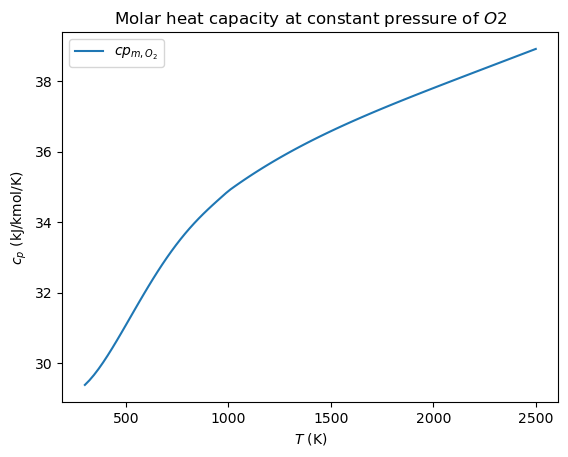

In [14]:
#Plot the results
plt.plot(T_list,cp_m_O2_list, label='$cp_{m,O_2}$')
plt.xlabel('$T$ (K)')
plt.ylabel('$c_p$ (kJ/kmol/K)')
plt.title('Molar heat capacity at constant pressure of $O2$')
plt.legend()

#### Question 3: Plot specific heat capacity at constant pressure and at constant volume over the same range of temperature. 

In [15]:
#Calculate mass-based heat capacities 
cp_O2_list = [val/O2.molecular_weight for val in cp_m_O2_list] # in kJ/kg/K

cv_O2_list = [val - ct.constants.gas_constant/O2.molecular_weight/1000 for val in cp_O2_list] # in kJ/kg/K


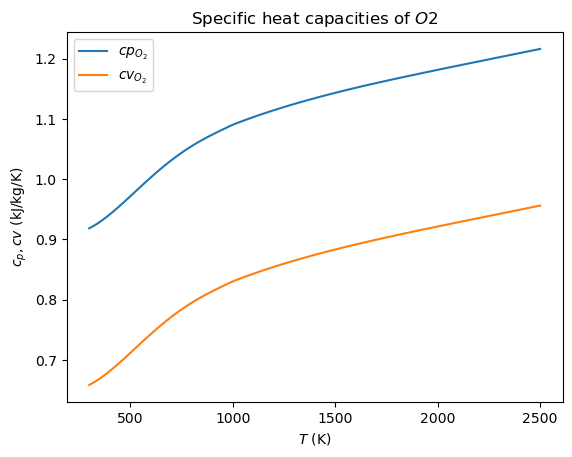

In [16]:
plt.plot(T_list,cp_O2_list, label='$cp_{O_2}$')
plt.plot(T_list,cv_O2_list, label='$cv_{O_2}$')
plt.xlabel('$T$ (K)')
plt.ylabel('$c_p, cv$ (kJ/kg/K)')
plt.title('Specific heat capacities of $O2$')
plt.legend()

#### Question 4. Calculate and plot the density and the viscosity of the air between 300 and 2500 K

In [17]:
gas1.TPX=300,101325,'N2:0.79,O2:0.21'

In [18]:
rho_list= []
visc_list= []

for T in T_list:
    gas1.TP=T, ct.one_atm
    rho_list.append(gas1.density)
    visc_list.append(gas1.viscosity)

Text(0.5, 1.0, 'Density of air')

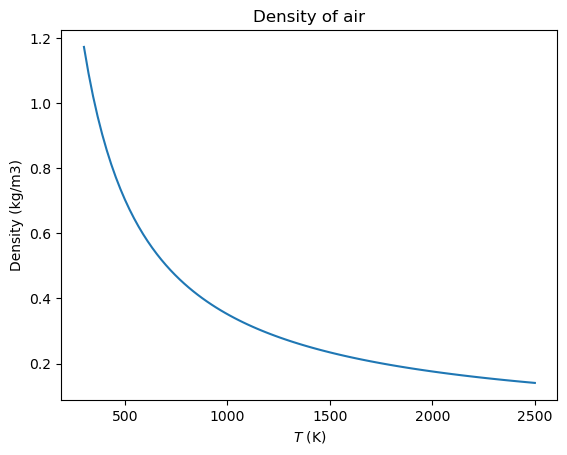

In [19]:
plt.plot(T_list, rho_list) 
plt.xlabel('$T$ (K)')
plt.ylabel('Density (kg/m3)')
plt.title('Density of air')

Text(0.5, 1.0, 'Viscosity of air')

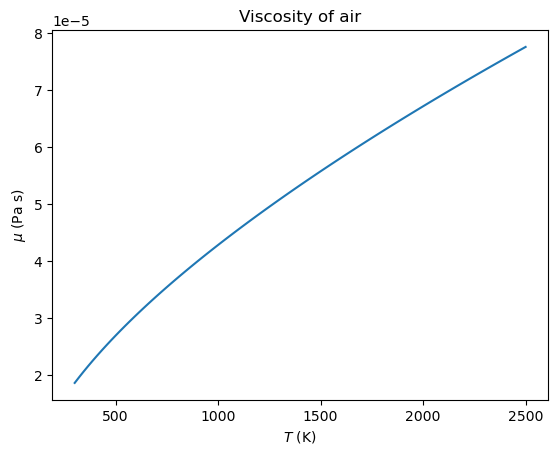

In [20]:
plt.plot(T_list, visc_list) 
plt.xlabel('$T$ (K)')
plt.ylabel('$\mu$ (Pa s)')
plt.title('Viscosity of air')

#### Question 5: Solve the exercise from Lect. 1 with Cantera
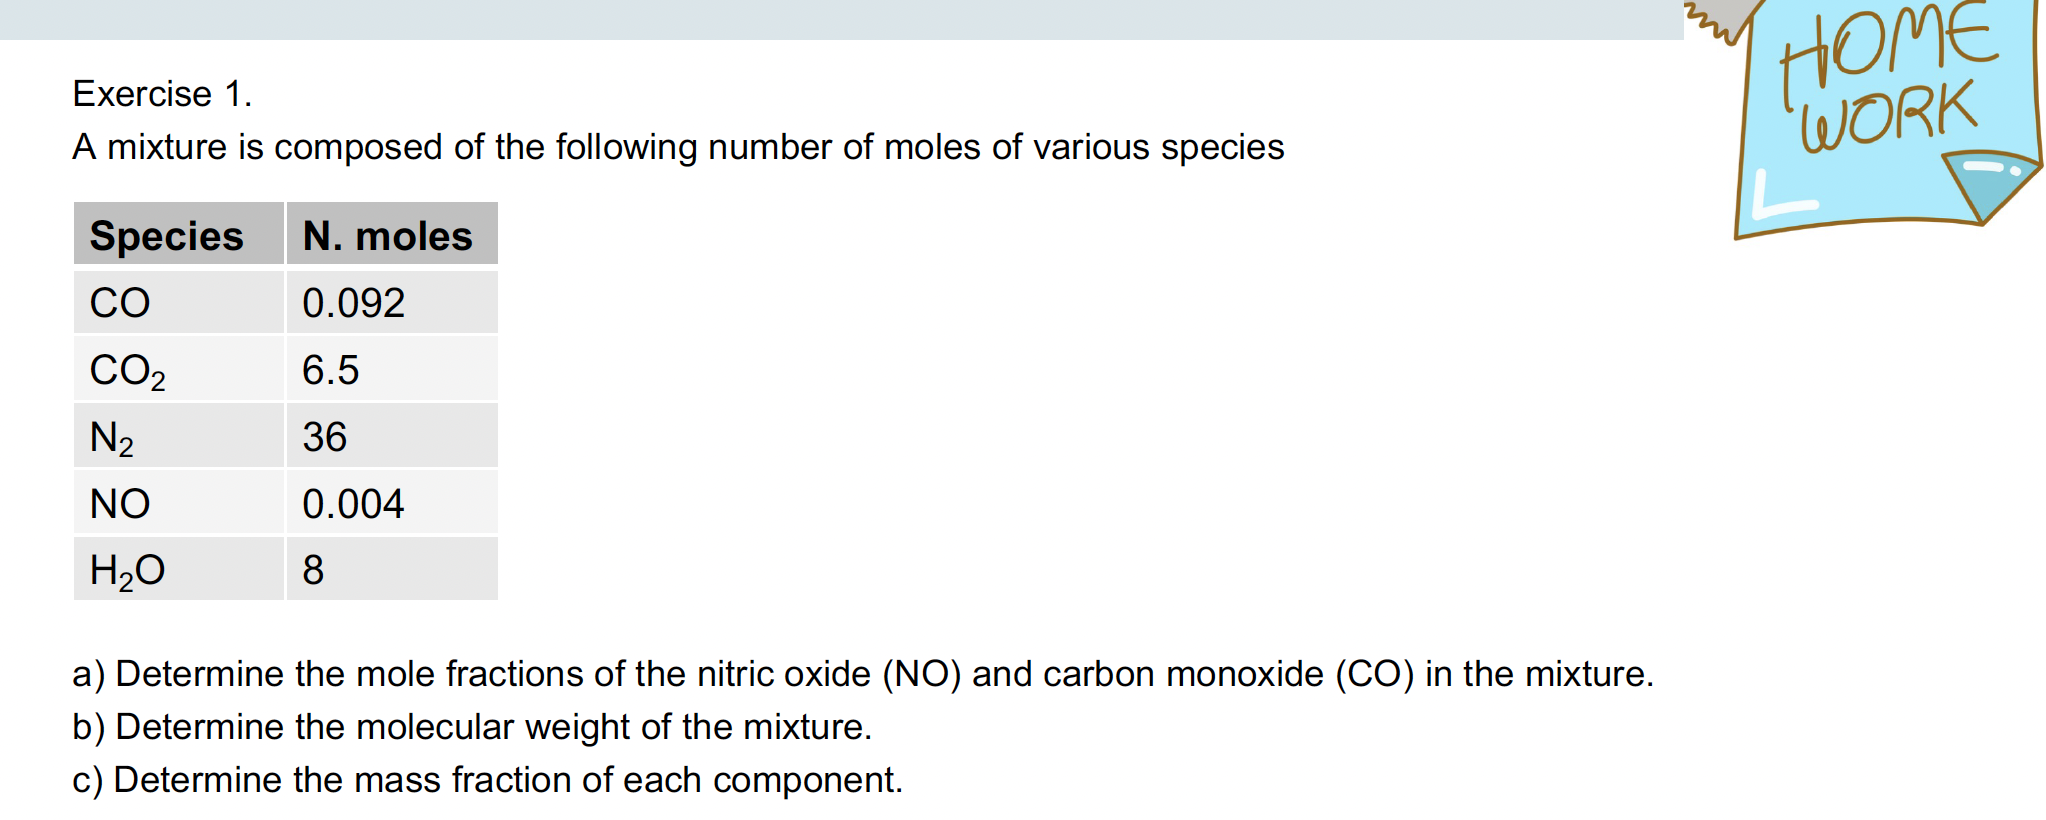

In [21]:
#Data
n_co=0.092
n_co2=6.5
n_n2=36
n_no=0.004
n_h2o=8

#Total moles
nTot=n_co+n_co2+n_n2+n_no+n_h2o; 

In [22]:
#Calculation of mole fractions

x_co=n_co/nTot
x_co2=n_co2/nTot
x_n2=n_n2/nTot
x_no=n_no/nTot
x_h2o=n_h2o/nTot

print('Answer to question a):',' mole fraction NO:', x_no, 'mole fraction CO:',x_co)

Answer to question a):  mole fraction NO: 7.905763301446756e-05 mole fraction CO: 0.0018183255593327537


In [23]:
# Calculation of the molecular weight of the mixture

gas1.TPX=300,101325, {'CO':x_co,'CO2':x_co2,'N2':x_n2,'NO':x_no,'H2O':x_h2o}
W_mix = gas1.mean_molecular_weight; 
print('Answer to question b): W =',W_mix)

Answer to question b): W = 28.488011779587318


In [24]:
# Determine the mass fraction of the component 
gas1.Y; 
print('Answer to question c): The mass fractions are:')
print ('Y_CO:', gas1.Y[gas1.species_index('CO')])
print ('Y_CO2:', gas1.Y[gas1.species_index('CO2')])
print ('Y_N2:', gas1.Y[gas1.species_index('N2')])
print ('Y_NO:', gas1.Y[gas1.species_index('NO')])
print ('Y_H2O:', gas1.Y[gas1.species_index('H2O')])

Answer to question c): The mass fractions are:
Y_CO: 0.0017878151452255624
Y_CO2: 0.19846162035317608
Y_N2: 0.699679743733046
Y_NO: 8.327023151302832e-05
Y_H2O: 0.09998755053703959


In [25]:
# Check if the sum of Y_i=1
Check = gas1.Y[gas1.species_index('CO')]+ gas1.Y[gas1.species_index('CO2')]+ gas1.Y[gas1.species_index('N2')]+ gas1.Y[gas1.species_index('NO')]+ gas1.Y[gas1.species_index('H2O')]
print (Check) 

1.0000000000000002


#### Question 6 Solve the exercise from Lect. 2 with Cantera
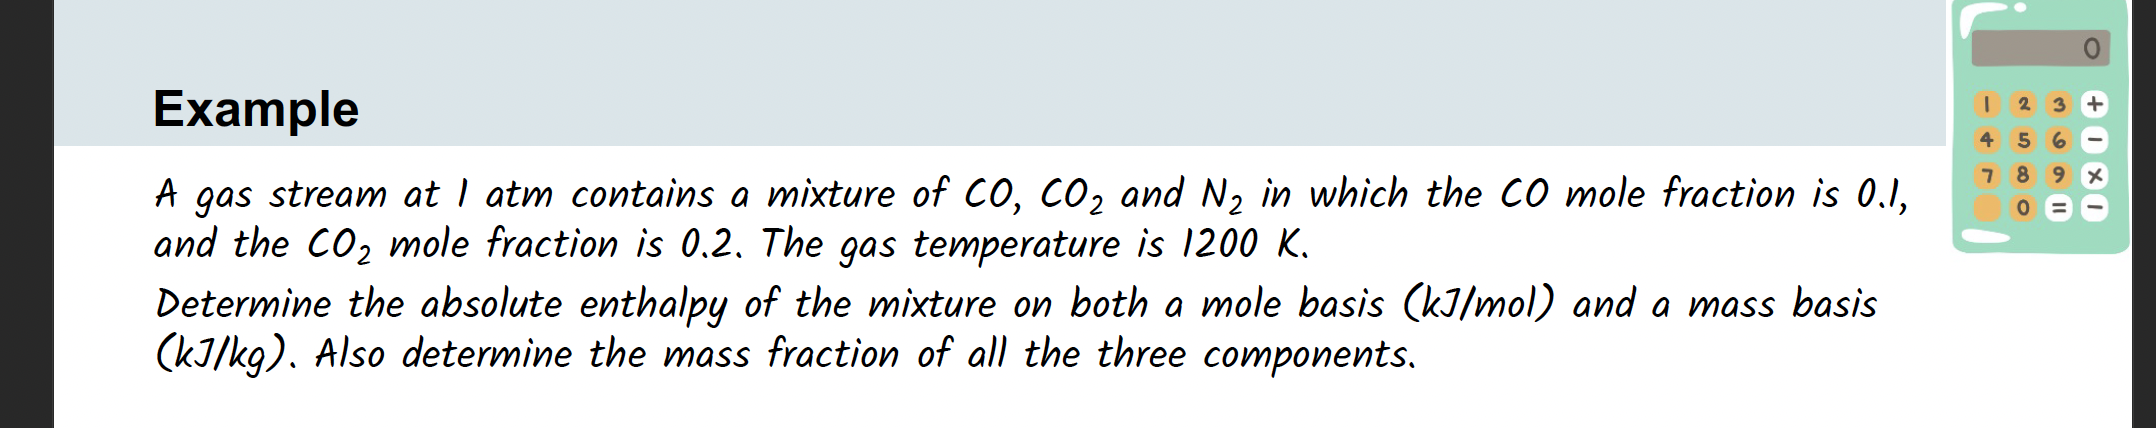

In [26]:
#Set the mixture
gas1.TPX = 1200,ct.one_atm, 'CO:0.1,CO2:0.2,N2:0.7'


i_co  = gas1.species_index('CO')
i_co2 = gas1.species_index('CO2')
i_n2  = gas1.species_index('N2')

#partial molar enthalpies
h_m_co=gas1.partial_molar_enthalpies[i_co]
h_m_co2=gas1.partial_molar_enthalpies[i_co2]
h_m_n2=gas1.partial_molar_enthalpies[i_n2]

#Determine molar enthalpy as sum of partial enthalpies
h_m_mix = 0.1*h_m_co+0.2*h_m_co2+0.7*h_m_n2
h_m_mix =h_m_mix/1000# kJ/kmol
print('1. Absolute Enthalpy (molar-based):', h_m_mix, 'kJ/kmol')

#Molar enthalpy
h_m_mix = gas1.enthalpy_mole/1000 # kJ/kmol
print('2. Absolute Enthalpy (molar-based):', h_m_mix, 'kJ/kmol')


#Enthalpy
h_mix=gas1.enthalpy_mass/1000 #kJ/kg
print('Absolute Enthalpy (mass-based):', h_mix, 'kJ/kg')

#Mass fractions
Y_CO  = gas1.Y[gas1.species_index('CO')]
Y_CO2 = gas1.Y[gas1.species_index('CO2')]
Y_N2  = gas1.Y[gas1.species_index('N2')]

print('Y_CO = ',Y_CO, 'Y_CO2 = ',Y_CO2, 'Y_N2 = ',Y_N2)

1. Absolute Enthalpy (molar-based): -58334.17583792974 kJ/kmol
2. Absolute Enthalpy (molar-based): -58334.175837929746 kJ/kmol
Absolute Enthalpy (mass-based): -1868.9303626717974 kJ/kg
Y_CO =  0.0897394001140565 Y_CO2 =  0.2819950917257774 Y_N2 =  0.6282655081601659


#### Homework
#### Create a cantera script or notebook that is able to calculate and plot the molar heat capacity at constant pressure of N, O, H, H2, CO, CO2, H2O, NO2. (See Lect. 2, slide 24). Validate the results for CO2 and H2 extracting the data from the NIST Database  (https://webbook.nist.gov/cgi/cbook.cgi?ID=C124389&Units=SI&Mask=1&Type=JANAFG&Plot=on#JANAFG) and plot both set of data together

Further Example - on Adiabatic Flame Temperature
Source: https://cantera.org/dev/examples/python/thermo/mixing.html#sphx-glr-examples-python-thermo-mixing-py